In [2]:
# ! pip install --upgrade scikit-learn --user
# ! pip install missingno --user

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data handling
import numpy as np
import pandas as pd
import math

# Modelling Algorithms
## Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
# from sklearn.model_selection import RFECV # IS NOT USED AT ALL

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, scale

# Evaluation metrics
## Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

## Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
from IPython.core.display import HTML


In [4]:
# Configure Visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)


display(HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
"""))


In [29]:
# Import the data
df = pd.read_csv('CSV/diamonds.csv')
diamonds = df.copy()
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

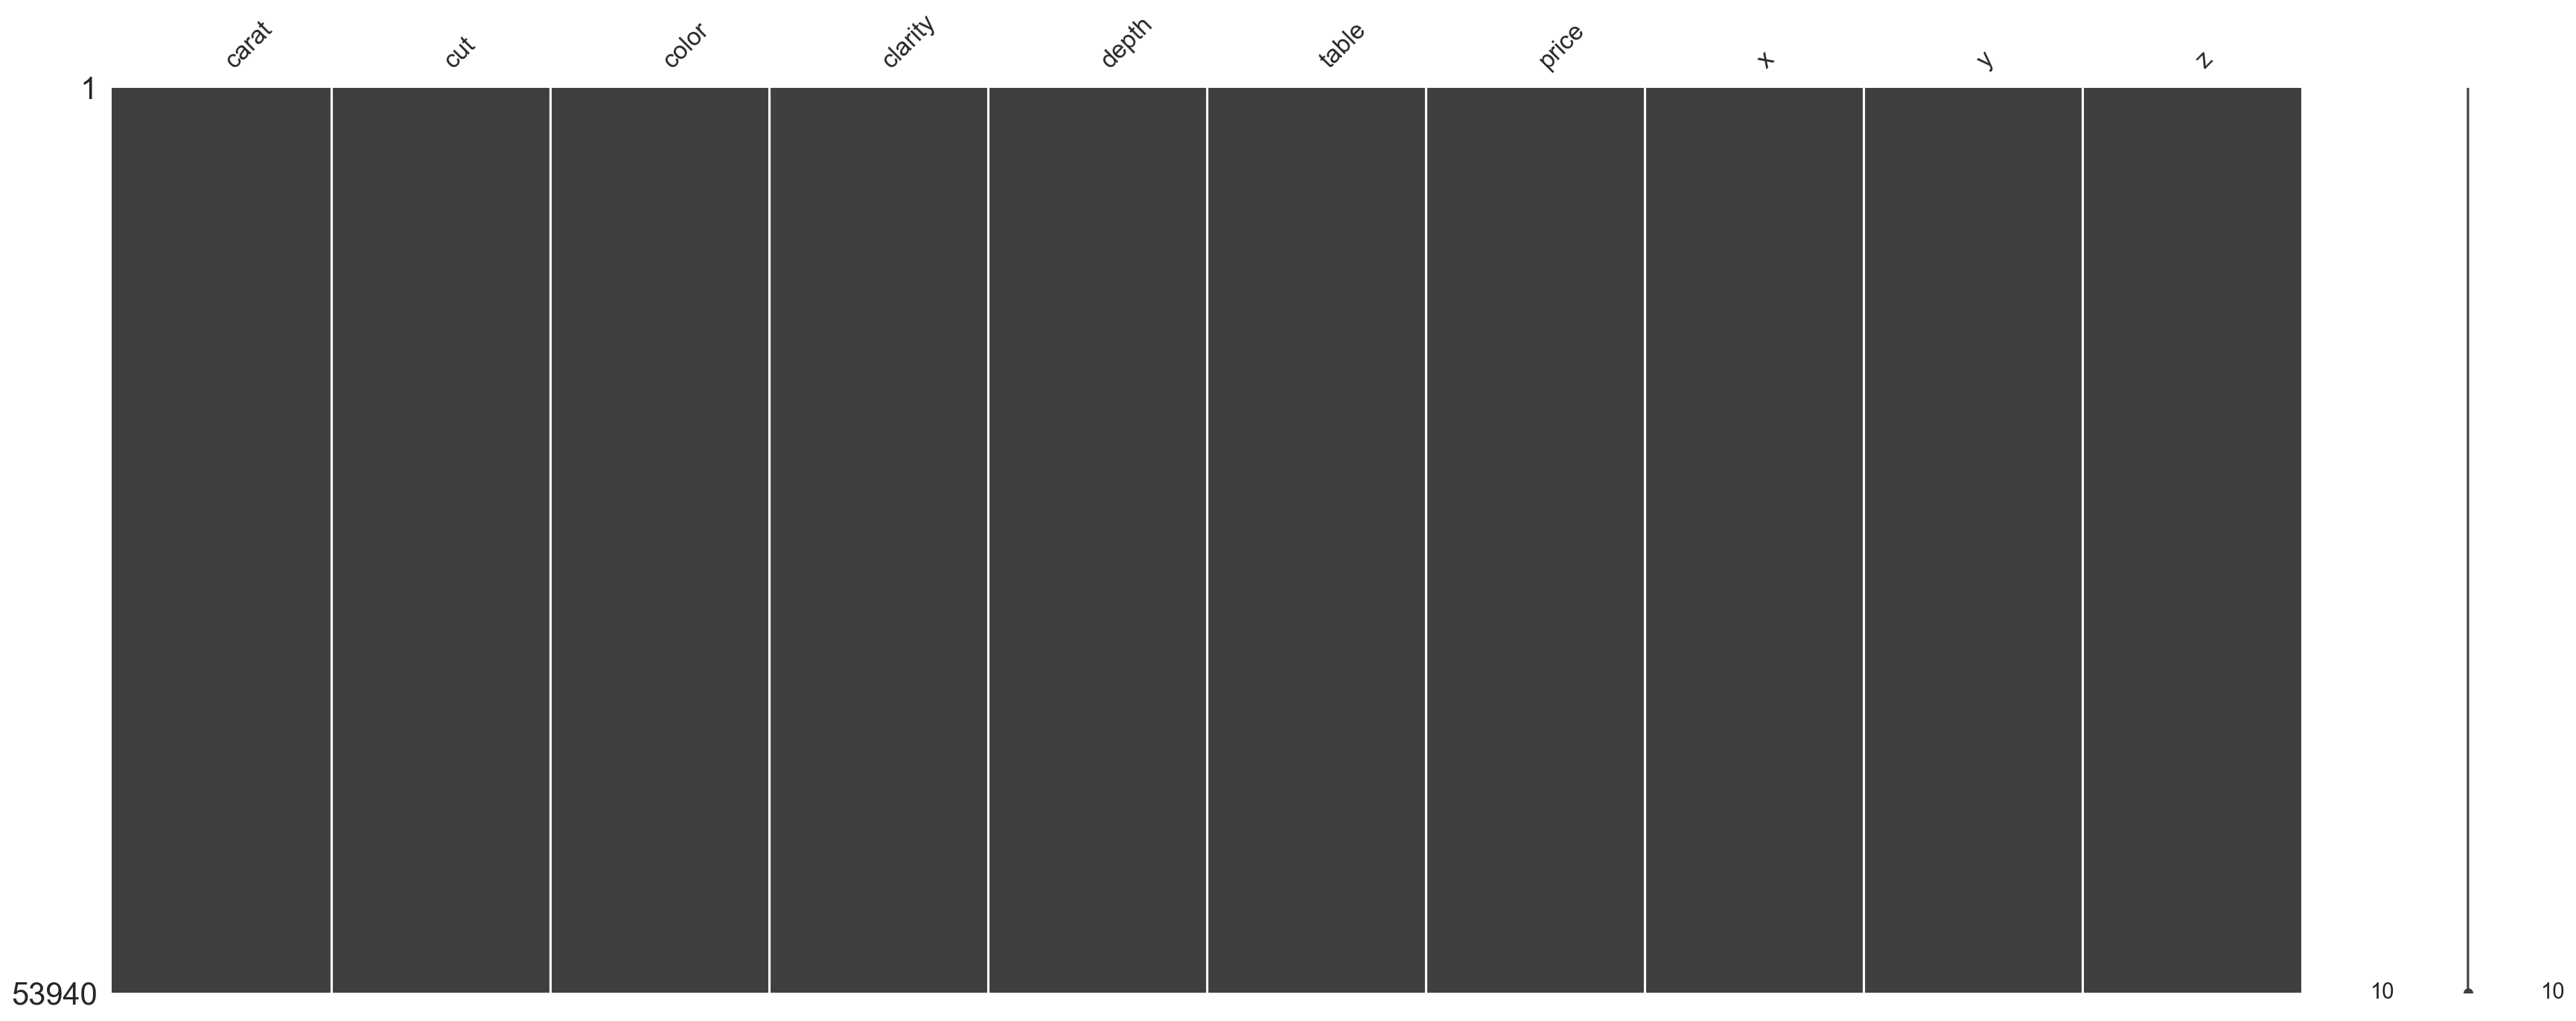

In [30]:
# Format data / prepare for use
## Drop Unnamed:0 column and inspect for null values, and get the dtypes
diamonds = diamonds.drop(columns="Unnamed: 0")
display(diamonds.info())
display(diamonds.isnull().sum())

# Visualize that no data is missing
msno.matrix(diamonds)

In [31]:
# Get the data statistics
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [45]:
# Minimum dimensions of x, y, and z are 0.  Count how many rows have 0 in each
# then return the rows.
display(f"There are: {len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])} rows in which dimensions are 0.")

# diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)] # THIS WAS REPLACED WITH THE FOLLOWING
diamonds[diamonds[['x', 'y', 'z']].eq(0).any(axis=1)]

'There are: 20 rows in which dimensions are 0.'

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [46]:
# Remove rows with dimensions of '0'
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

# Confirming Removal
display(f"There are: {len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])} rows in which dimensions are 0.")

'There are: 0 rows in which dimensions are 0.'

<h2>Visualize Features</h2>

Text(0.5, 0.98, 'Column Comparison')

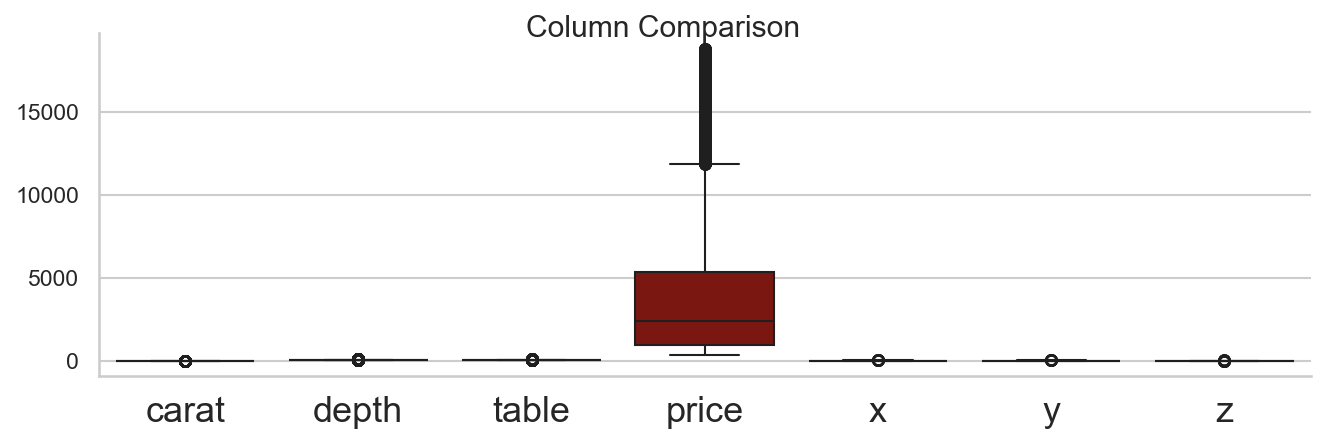

In [47]:
# Visualizing the data
# This was old way Seaborn < 0.9.0
# sns.factorplot(data=df , kind='box' , size=7, aspect=2.5)
# This is Seaborn >= 0.9.0
sns.catplot(data=diamonds, kind='box', height=3, aspect=3).fig.suptitle("Column Comparison")

<Axes: >

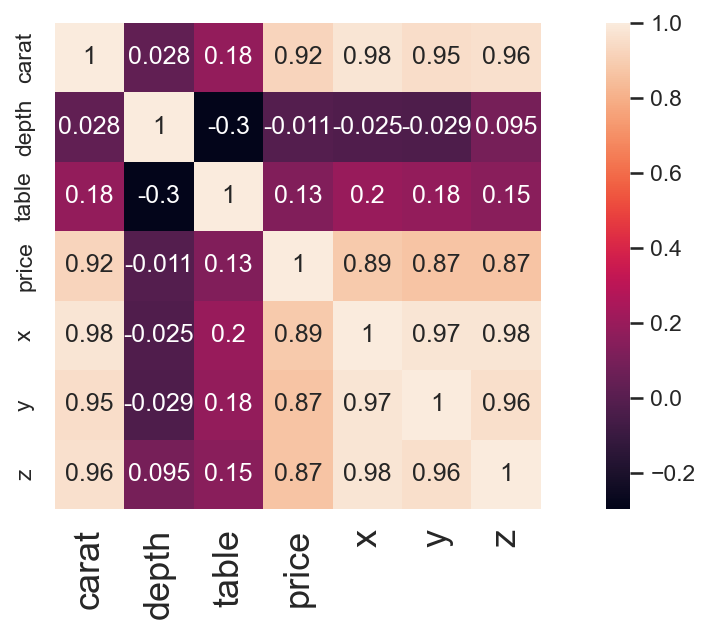

In [62]:
# Correlation Map
corr = diamonds[['carat','depth','table','price','x','y','z']].corr()
plt.figure(figsize=(10, 4))
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

<Axes: xlabel='carat', ylabel='Density'>

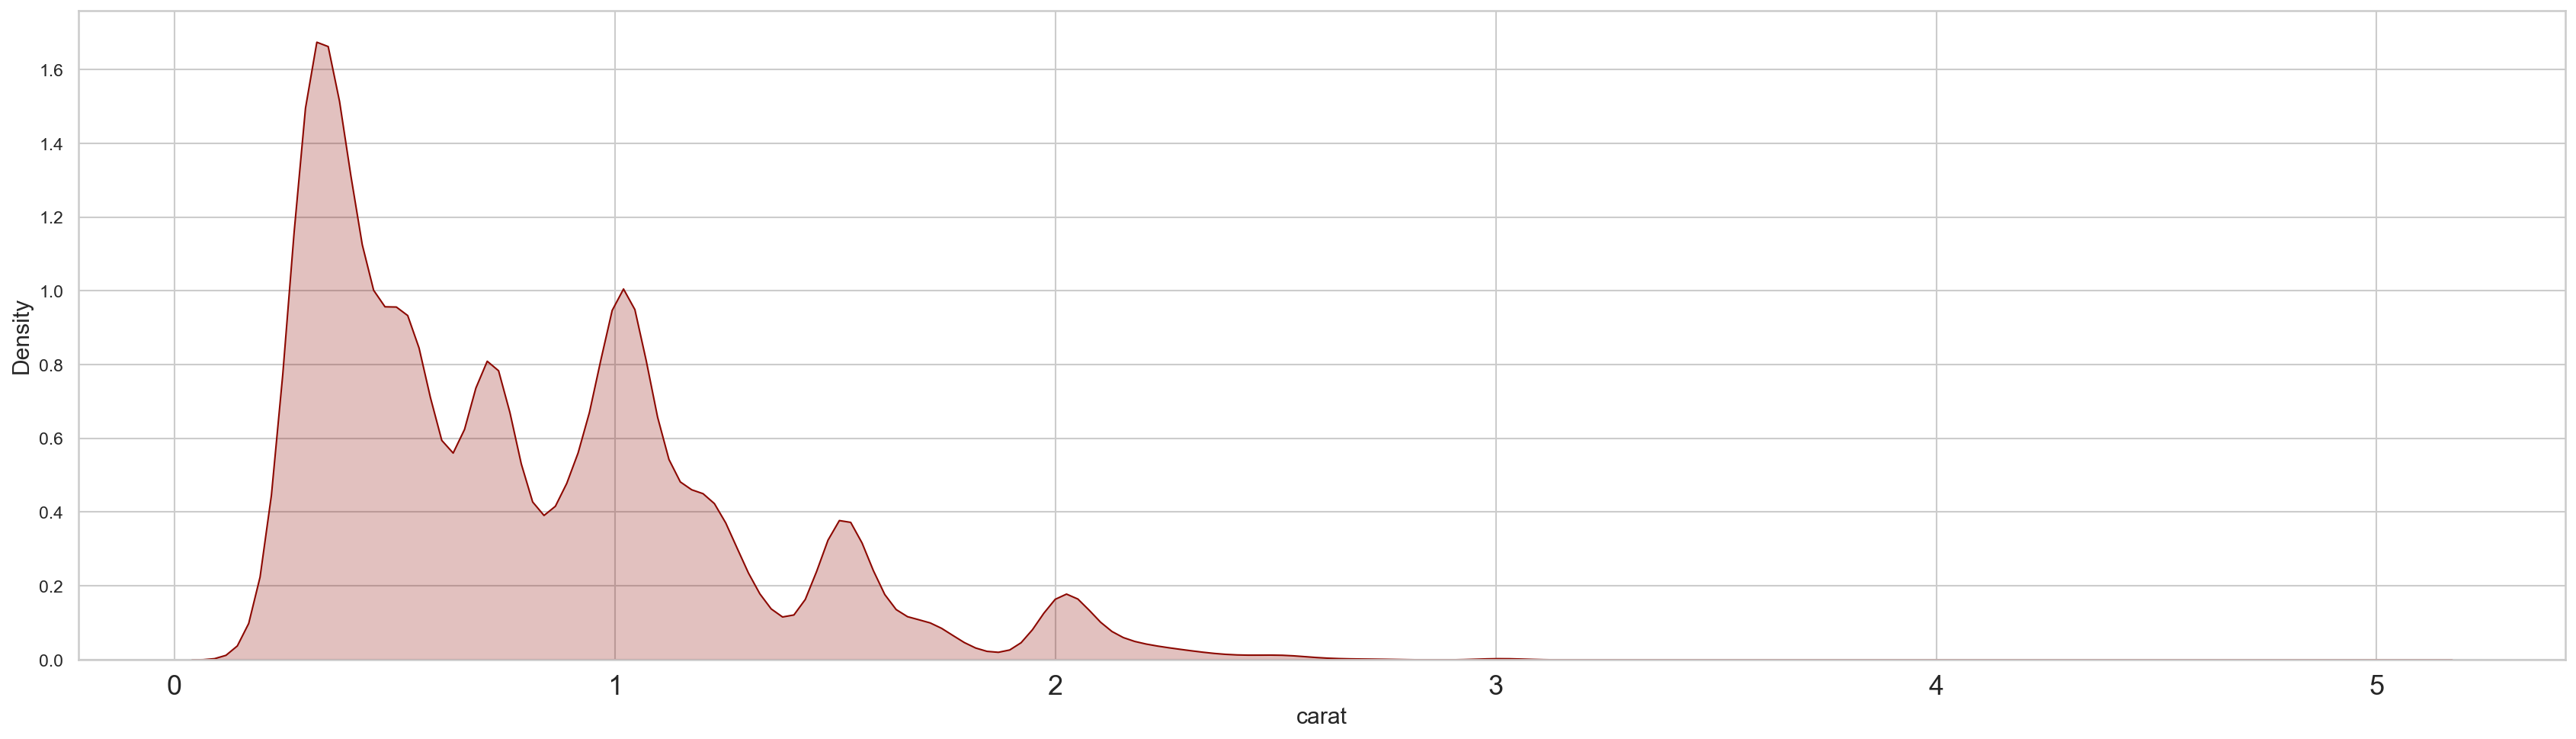

In [64]:
# Use kde to Visualize the carat data
sns.kdeplot(diamonds['carat'], fill=True, color='r')

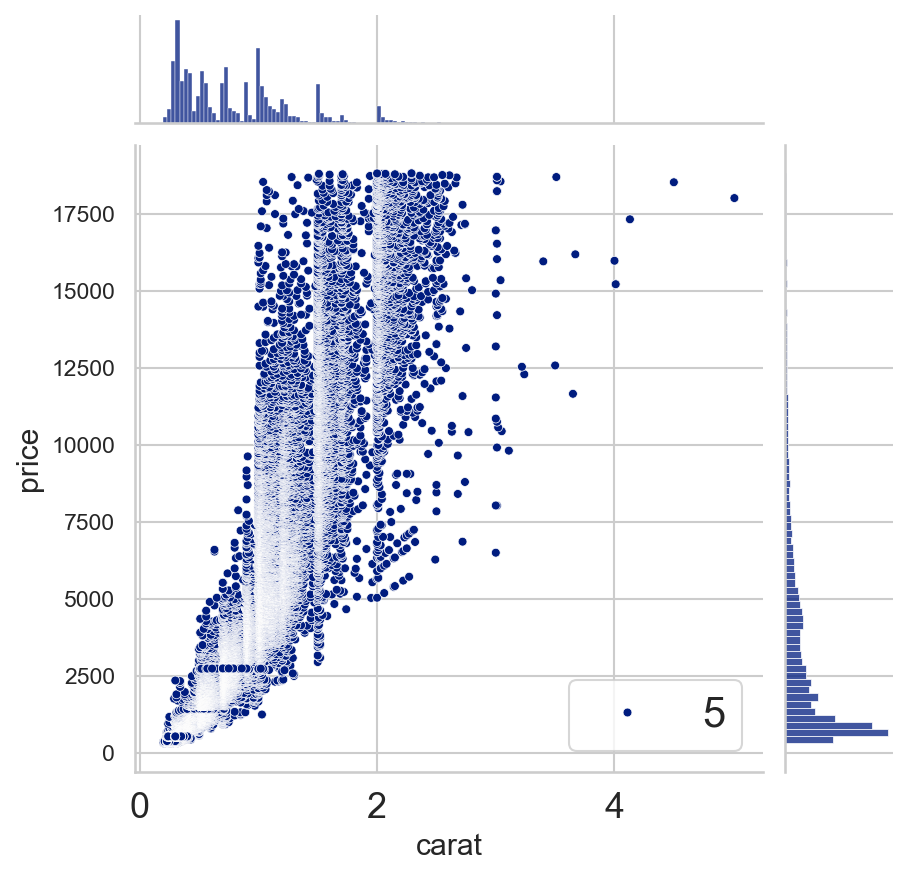

In [66]:
# Visualize data between Carat and Price
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)

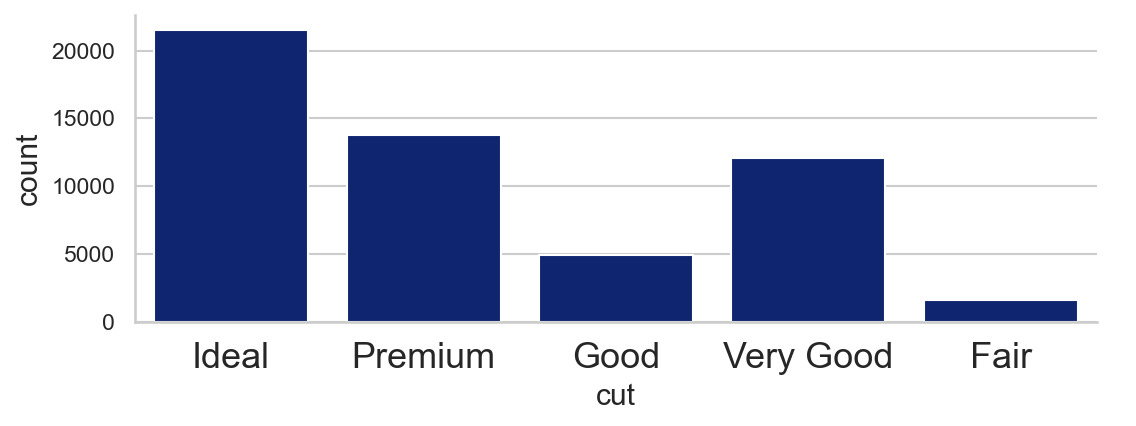

In [68]:
# Visualize 
sns.catplot(x='cut', data=diamonds , kind='count', height=3, aspect=2.5)

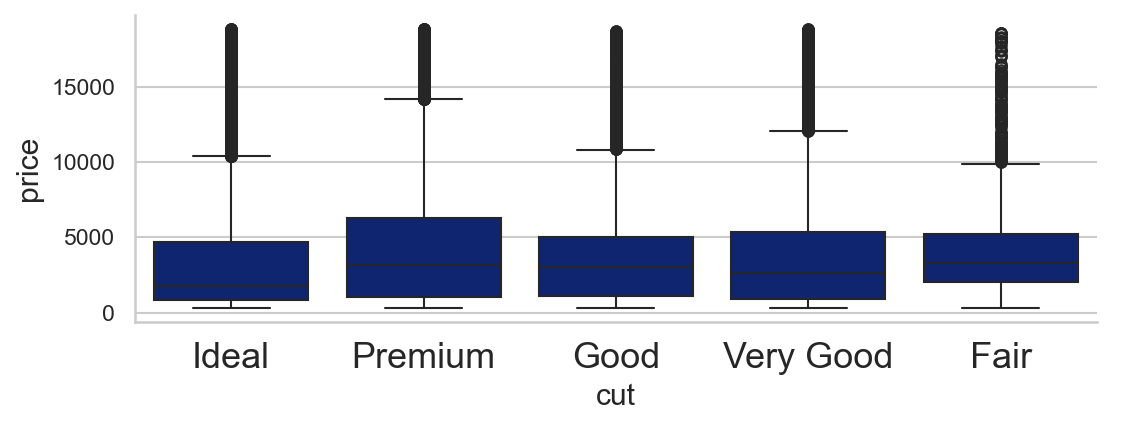

In [70]:
sns.catplot(x='cut', y='price', data=diamonds, kind='box', height=3, aspect=2.5)
# Understanding Box Plot :

# The bottom line indicates the min value of Age.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

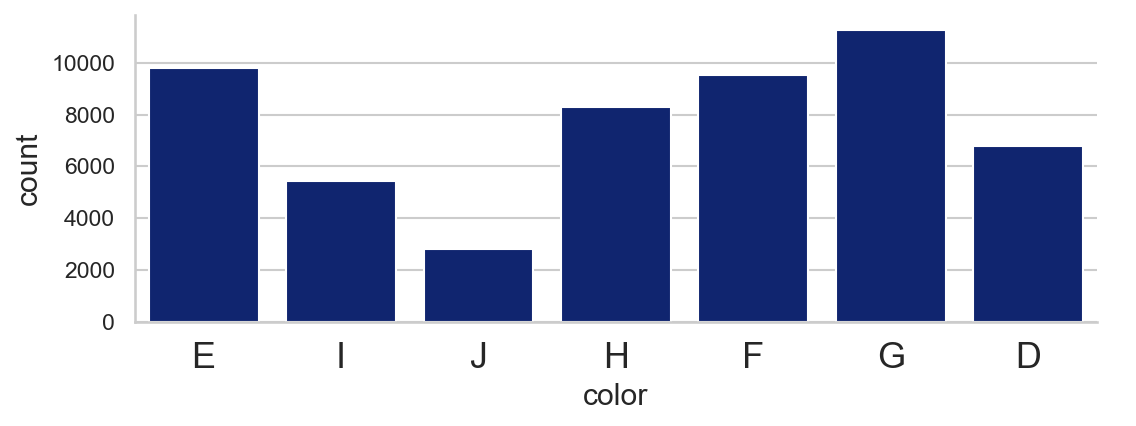

In [71]:
sns.catplot(x='color', data=diamonds, kind='count', height=3, aspect=2.5)


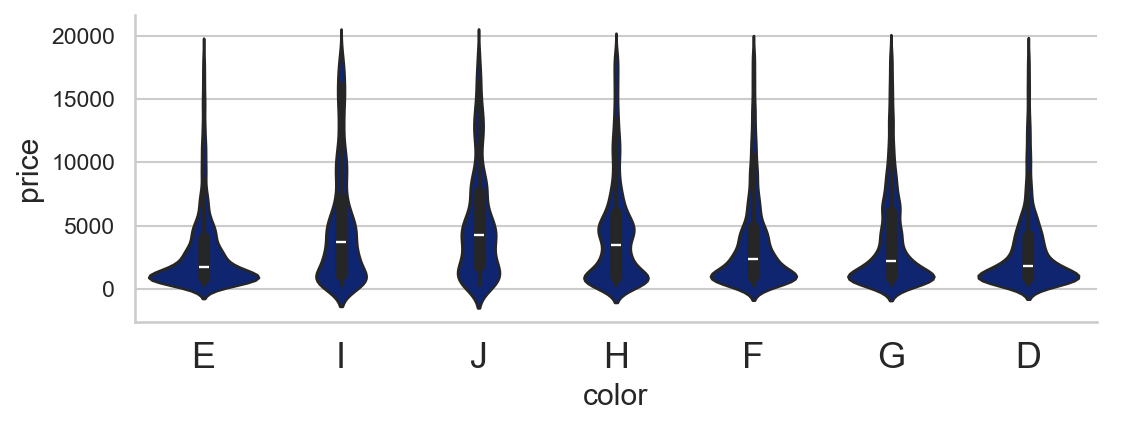

In [72]:
sns.catplot(x='color', y='price', data=diamonds, kind='violin', height=3, aspect=2.5)

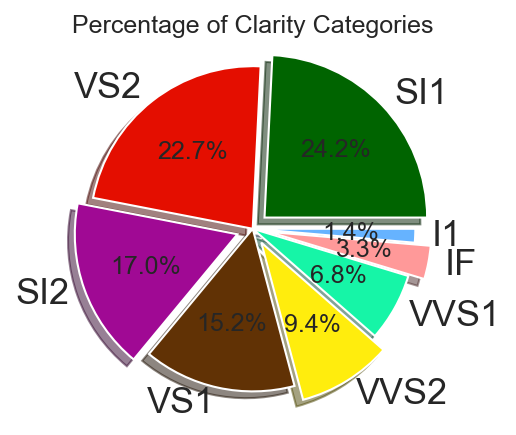

In [74]:
# Get data
sizes = diamonds['clarity'].value_counts()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7', '#ff9999', '#66b3ff']
explode = (0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0)

# Plot
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=sizes.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

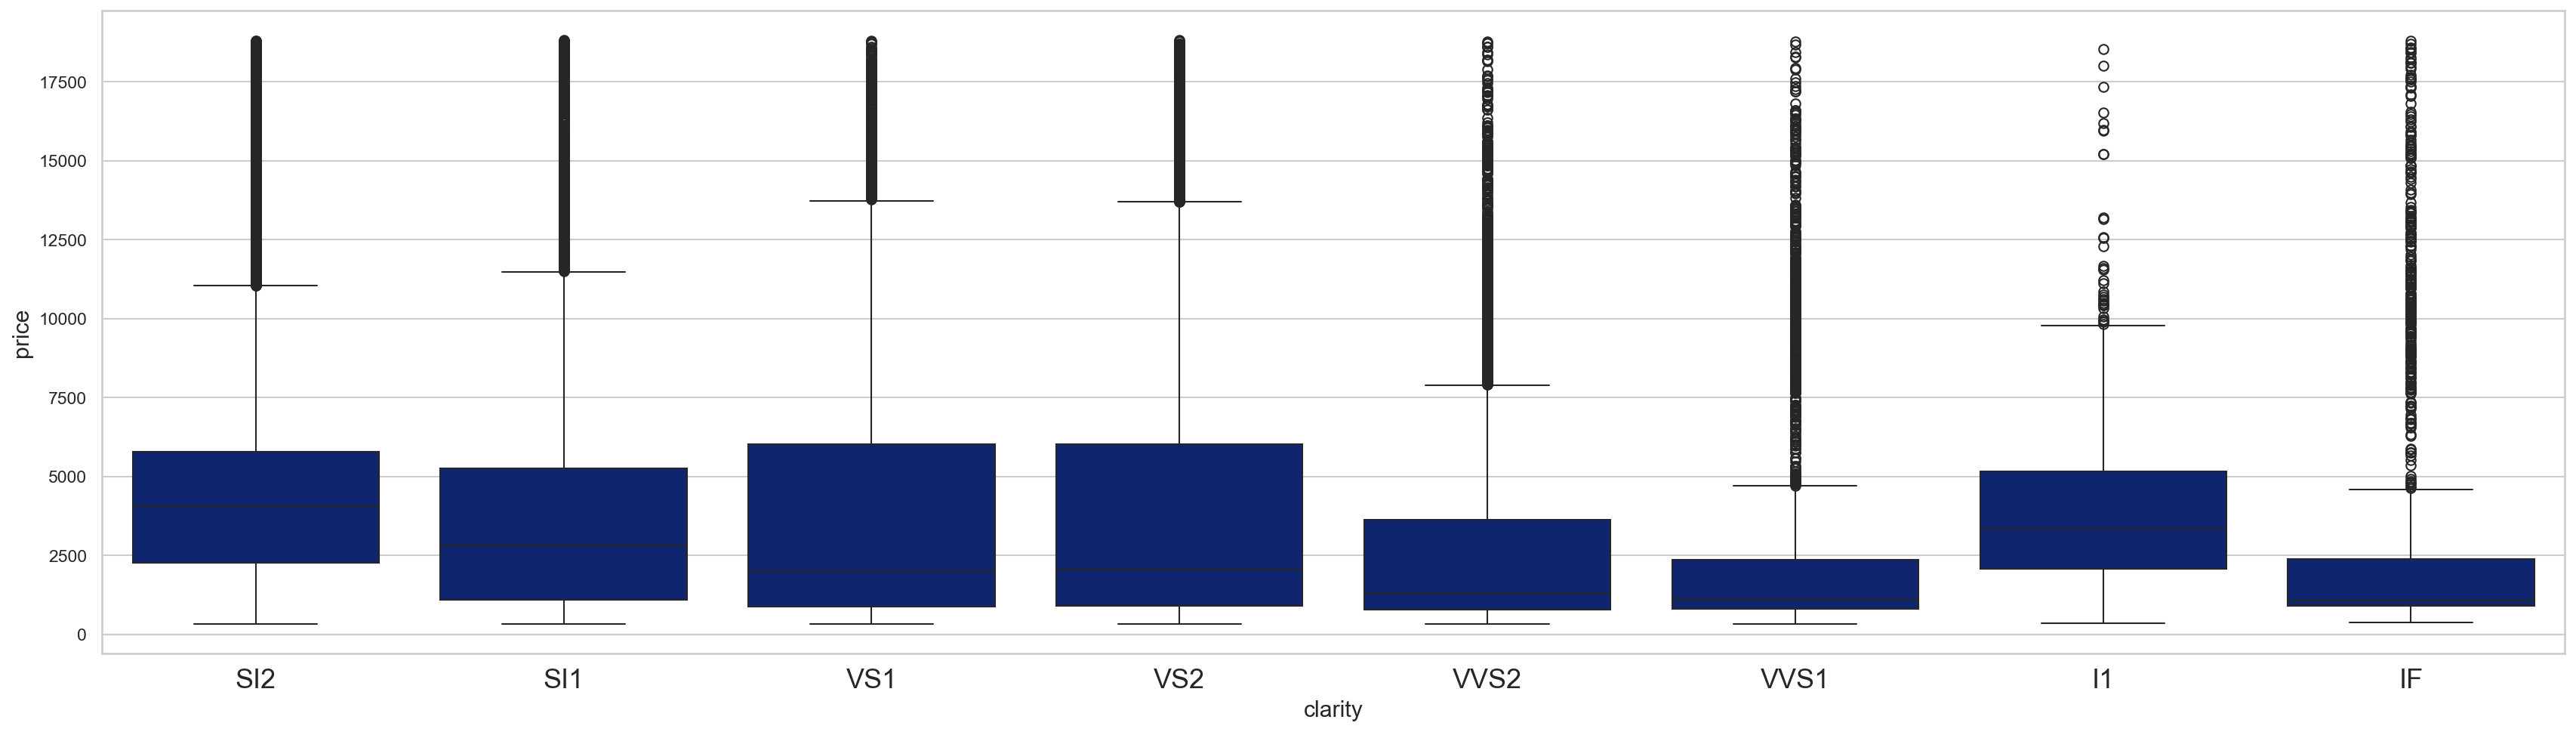

In [78]:
# More Box Plots
sns.boxplot(x='clarity', y='price', data=diamonds)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

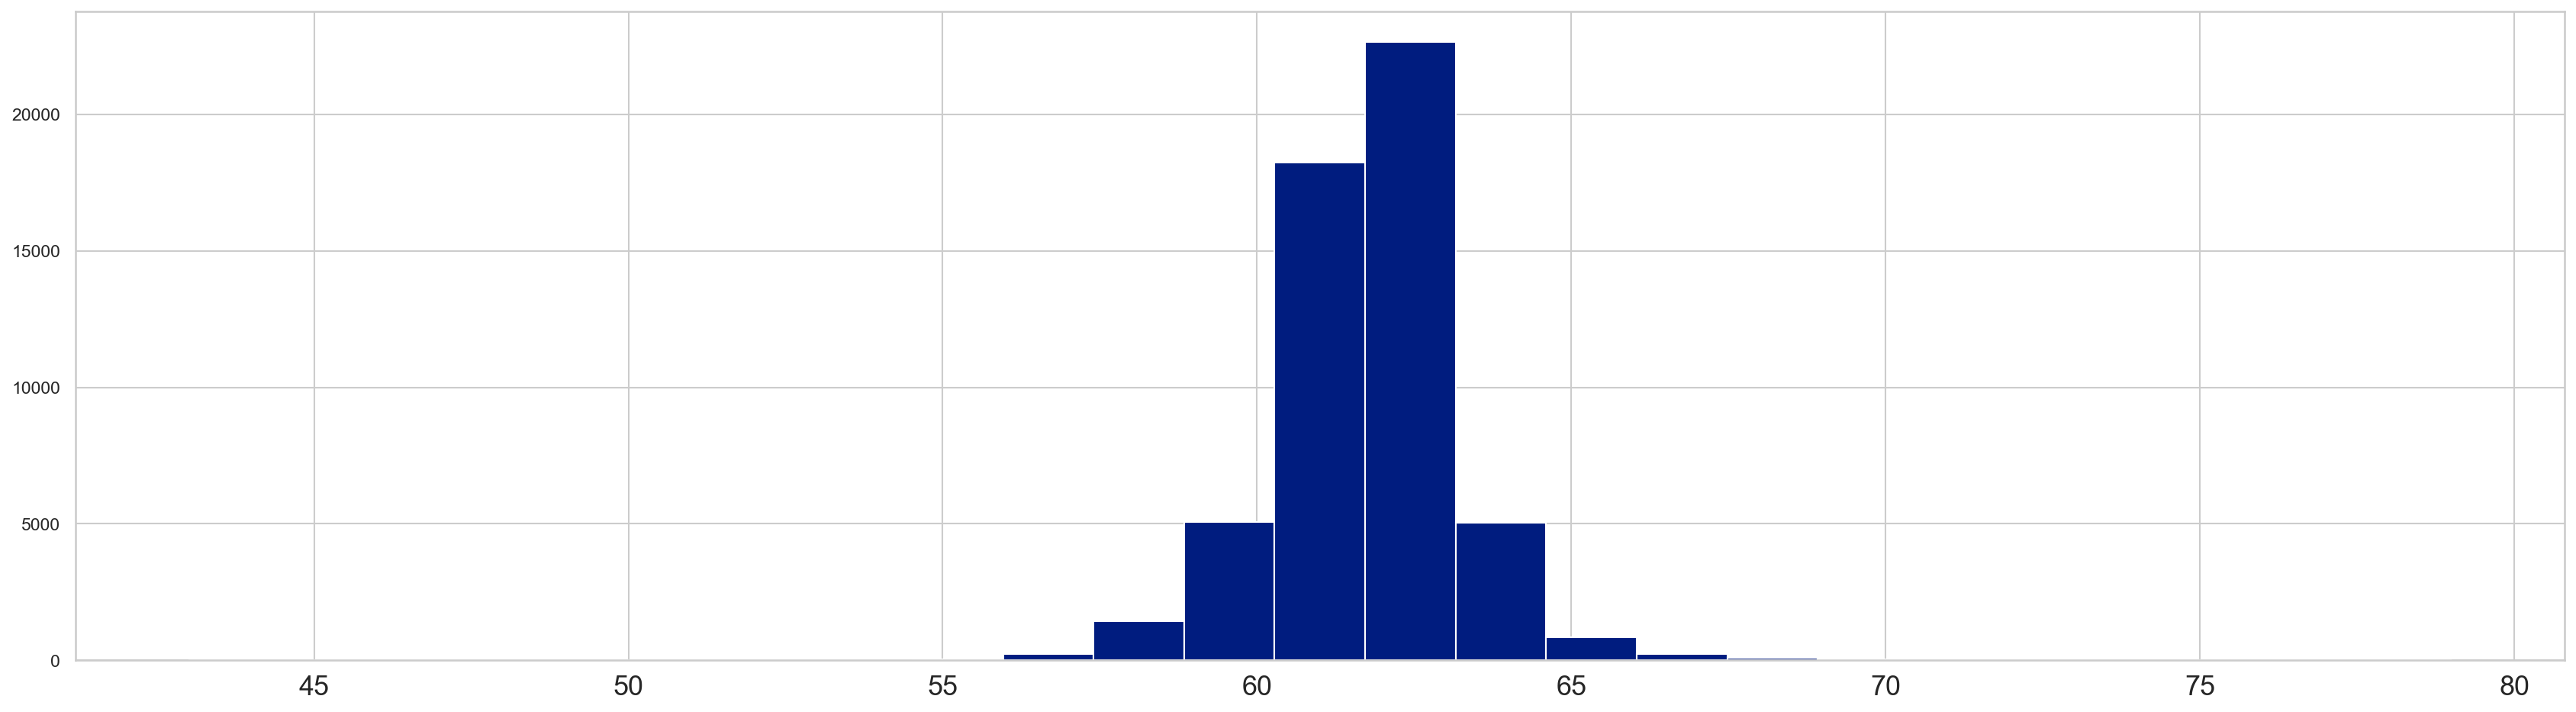

In [79]:
# Visualization Histagram
plt.hist('depth', data=diamonds, bins=25)

<Axes: xlabel='table', ylabel='Density'>

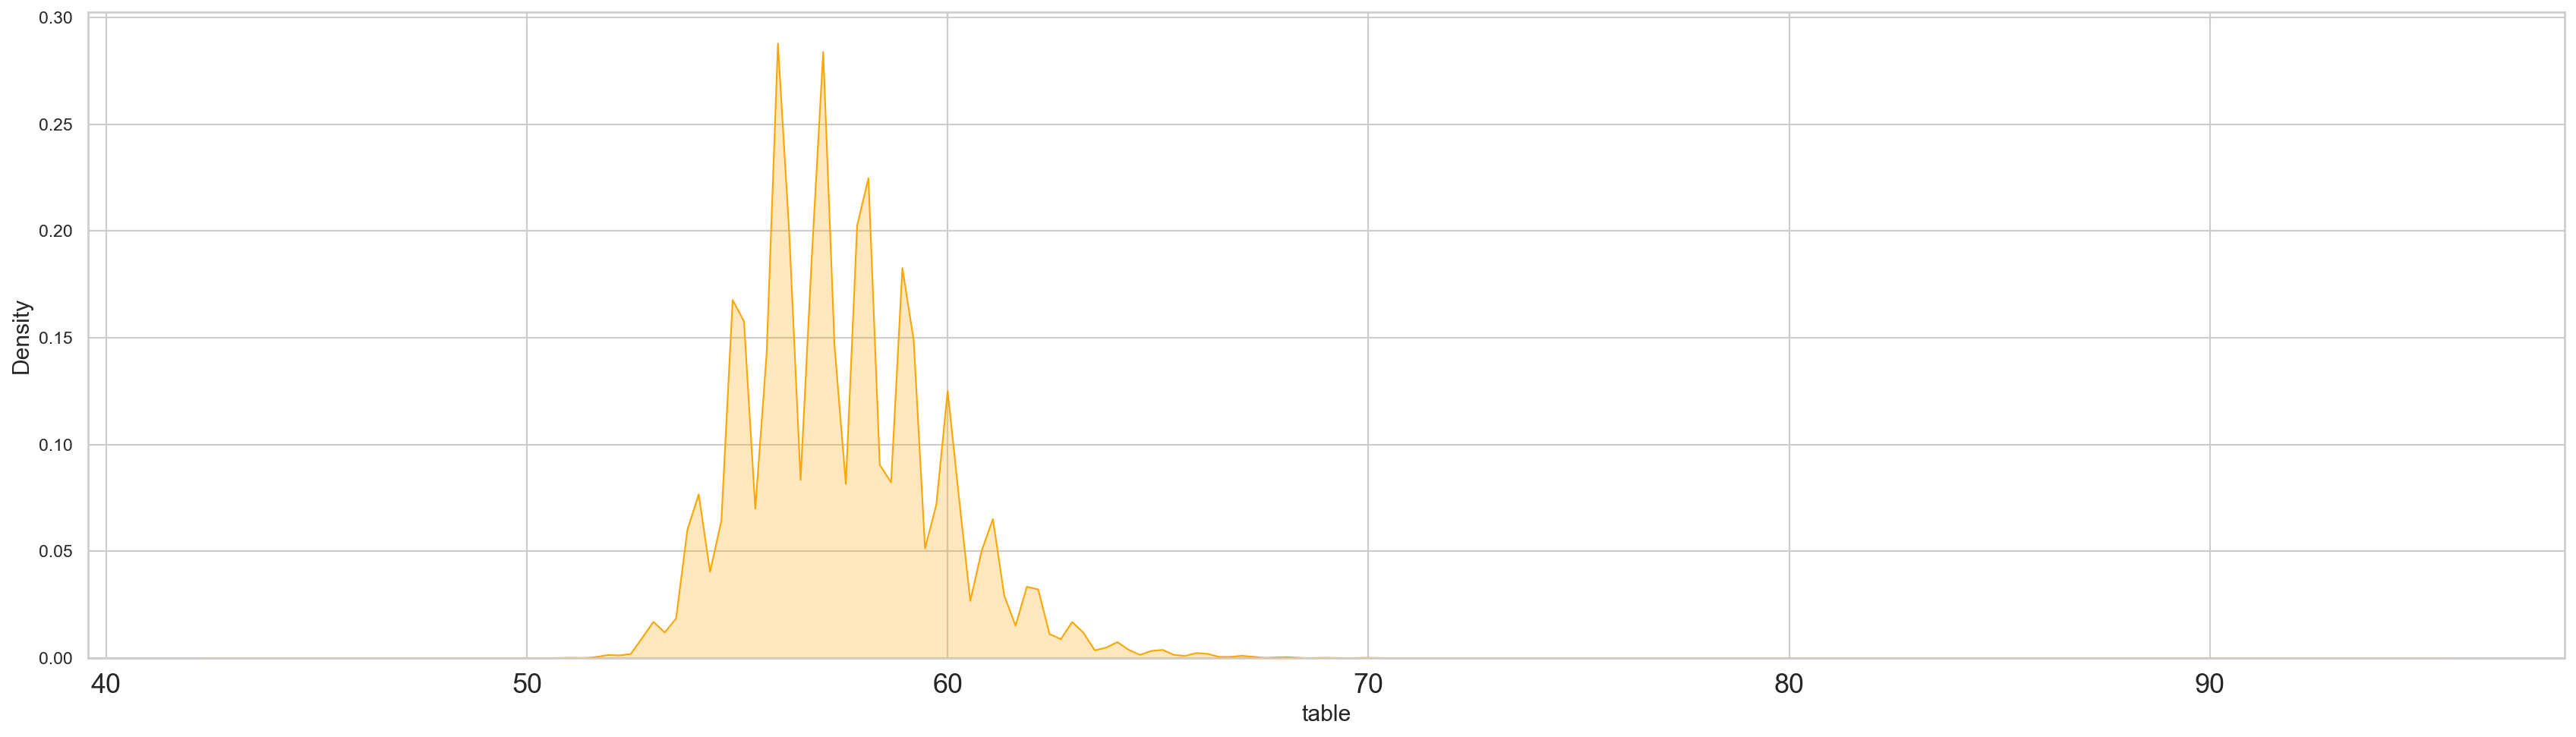

In [80]:
sns.kdeplot(diamonds['table'] ,shade=True , color='orange')

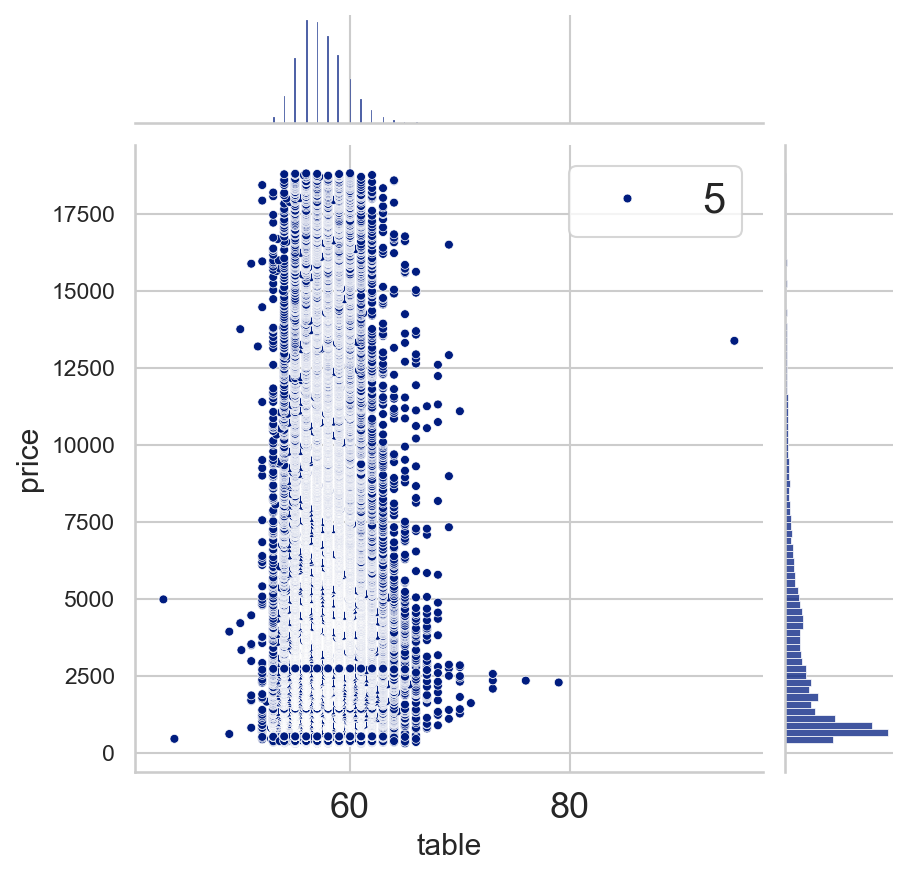

In [82]:
# Visualization
sns.jointplot(x='table', y='price', data=diamonds, size=5)

(2.0, 10.0)

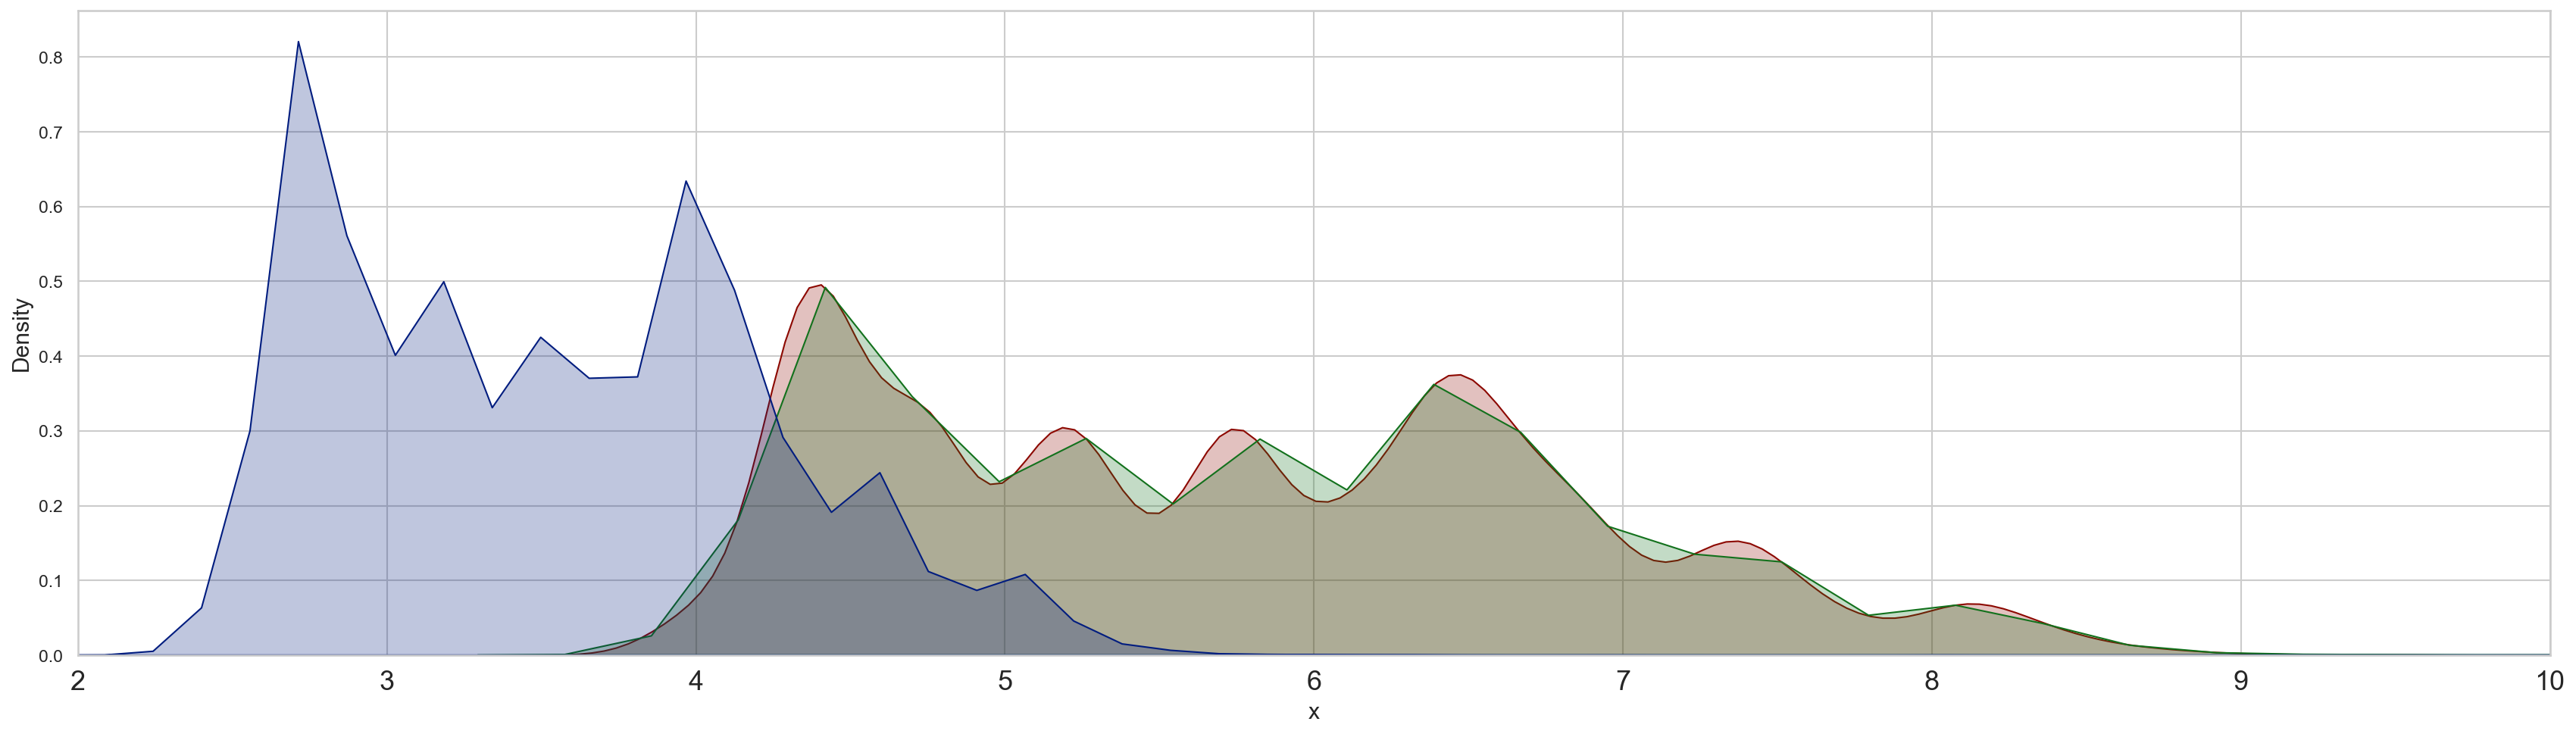

In [83]:
# More Visualizations
sns.kdeplot(diamonds['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds['y'] , shade=True , color='g' )
sns.kdeplot(diamonds['z'] , shade= True , color='b')
plt.xlim(2,10)

In [84]:
# Create new column called Volume
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

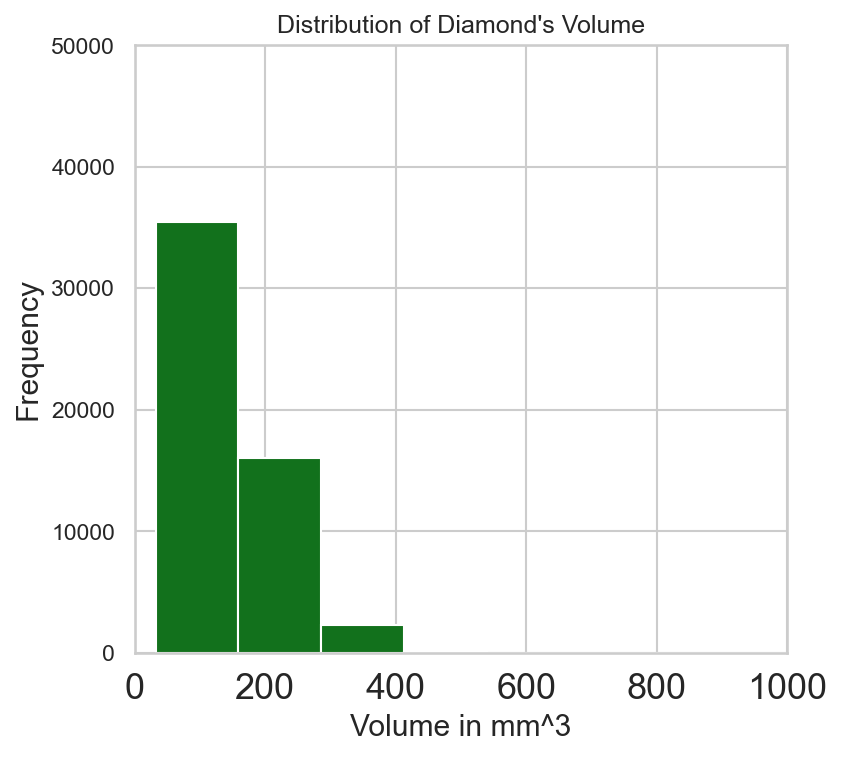

In [85]:
# Visualization
plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

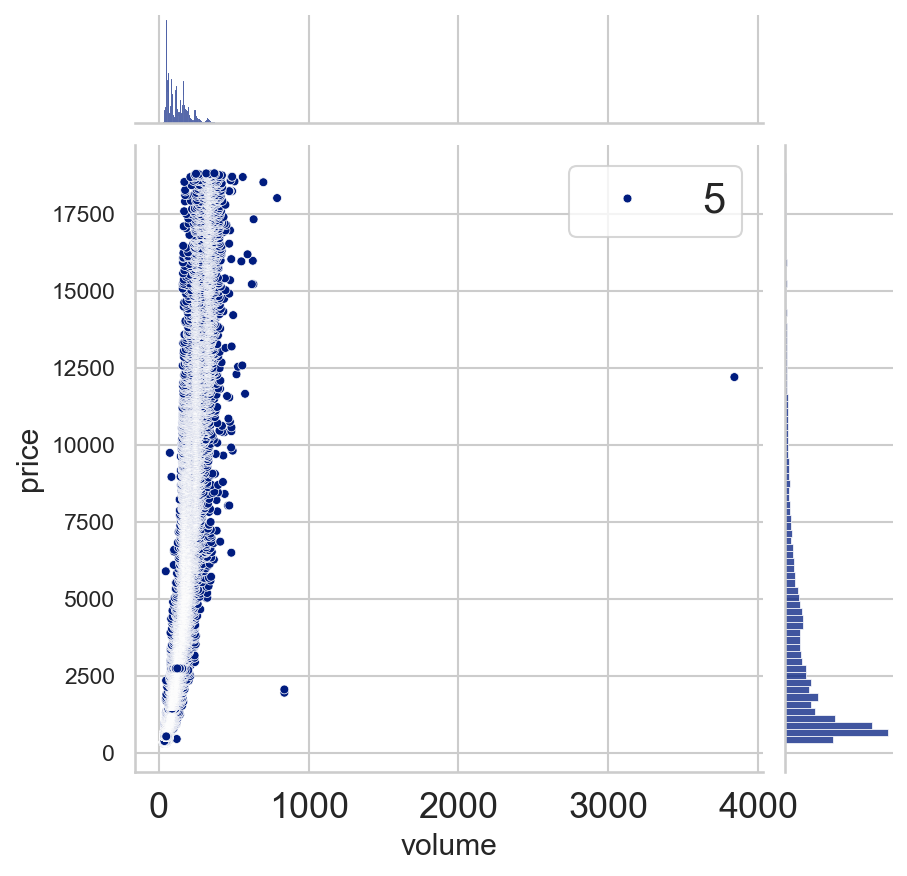

In [86]:
sns.jointplot(x='volume', y='price' , data=diamonds, size=5)

<h2>Scale the Data</h2>

In [87]:
diamonds.drop(['x','y','z'], axis=1, inplace=True)
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

diamonds['cut'] = label_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_clarity.fit_transform(diamonds['clarity'])

# Split the data into train and test.
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [88]:
# Applying Feature Scaling ( StandardScaler )
# You can also Apply MinMaxScaler.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'GradientBoosting Regression',
          'RandomForest Regression', 'KNeighbours Regression']


<h3>Linear Regression</h3>

In [89]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE    : 1911398.80 
MAE    : 926.72 
RMSE   : 1382.53 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


<h3>Lasso Regression</h3>

In [91]:
clf_la = Lasso()
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8814
[0.87146434 0.88349434 0.87757734 0.87636606 0.88384393]

MSE    : 1911408.72 
MAE    : 926.25 
RMSE   : 1382.54 
R2     : 0.88 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


<h3>AdaBoost Regression</h3>

In [92]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.9042
[0.86106461 0.87221145 0.89564564 0.86690095 0.87675307]

MSE    : 1543648.06 
MAE    : 875.42 
RMSE   : 1242.44 
R2     : 0.90 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.6s finished


<h3>Ridge Regression</h3>

In [93]:
clf_rr = Ridge()
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.8814
[0.87094576 0.88350862 0.87757823 0.87635359 0.88384919]

MSE    : 1911385.59 
MAE    : 926.70 
RMSE   : 1382.53 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


<h3>Gradient Boosting Regression</h3>

In [95]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='squared_error',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            1.29s
         2    12437807.7359            1.22s
         3    11113339.5845            1.23s
         4     9945244.2308            1.20s
         5     8973416.9156            1.20s
         6     8109014.7842            1.21s
         7     7387120.0500            1.17s
         8     6753937.9878            1.14s
         9     6197182.6819            1.11s
        10     5724689.0901            1.09s
        20     3200362.4597            0.91s
        30     2393542.3170            0.78s
        40     2102586.3335            0.65s
        50     1923964.9187            0.54s
        60     1790574.6006            0.43s
        70     1688380.2826            0.32s
        80     1609829.0076            0.21s
        90     1548089.0039            0.11s
       100     1499127.4566            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    13994442.1962            0.99s
         2    12429322.7982            0.93s
         3    11112606.0983            0.94s
         4     9944843.0686            0.89s
         5     8977395.9870            0.89s
         6     8111748.5741            0.88s
         7     7395490.7272            0.86s
         8     6765223.5285            0.85s
         9     6204866.4570            0.84s
        10     5734465.9748            0.83s
        20     3206145.1577            0.71s
        30     2394369.2846            0.61s
        40     2101114.6326            0.52s
        50     1921108.4005            0.43s
        60     1785959.4111            0.35s
        70     1683385.7302            0.26s
        80     1604163.5538            0.17s
        90     1542370.2912            0.09s
       100     1493476.7608            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            0.89s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


<h3>Random Forest Regressor</h3>

In [96]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.2s finished



###### Random Forest ######
Score : 0.9821
[0.97923637 0.98079859 0.98186987 0.97756004 0.98127307]

MSE    : 288684.93 
MAE    : 272.33 
RMSE   : 537.29 
R2     : 0.98 


*Not sure what this is yet*

In [97]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9790
R2     : 0.98 


<h3>KNeighbors Regression</h3>

In [98]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished



###### KNeighbours Regression ######
Score : 0.9590
[0.95429066 0.95857186 0.95505346 0.94931436 0.95517442]

MSE    : 660491.58 
MAE    : 425.09 
RMSE   : 812.71 
R2     : 0.96 


In [99]:
# Tuning Parameters
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9590
R2     : 0.96 


In [100]:
# Visualizing R2-Score of Algorithms
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.978995
6,KNeighbours Regression,0.959028
4,GradientBoosting Regression,0.905833
2,AdaBoost Regression,0.904244
3,Ridge Regression,0.881433
0,Linear Regression,0.881432
1,Lasso Regression,0.881431


<Axes: xlabel='R2-Scores', ylabel='Algorithms'>

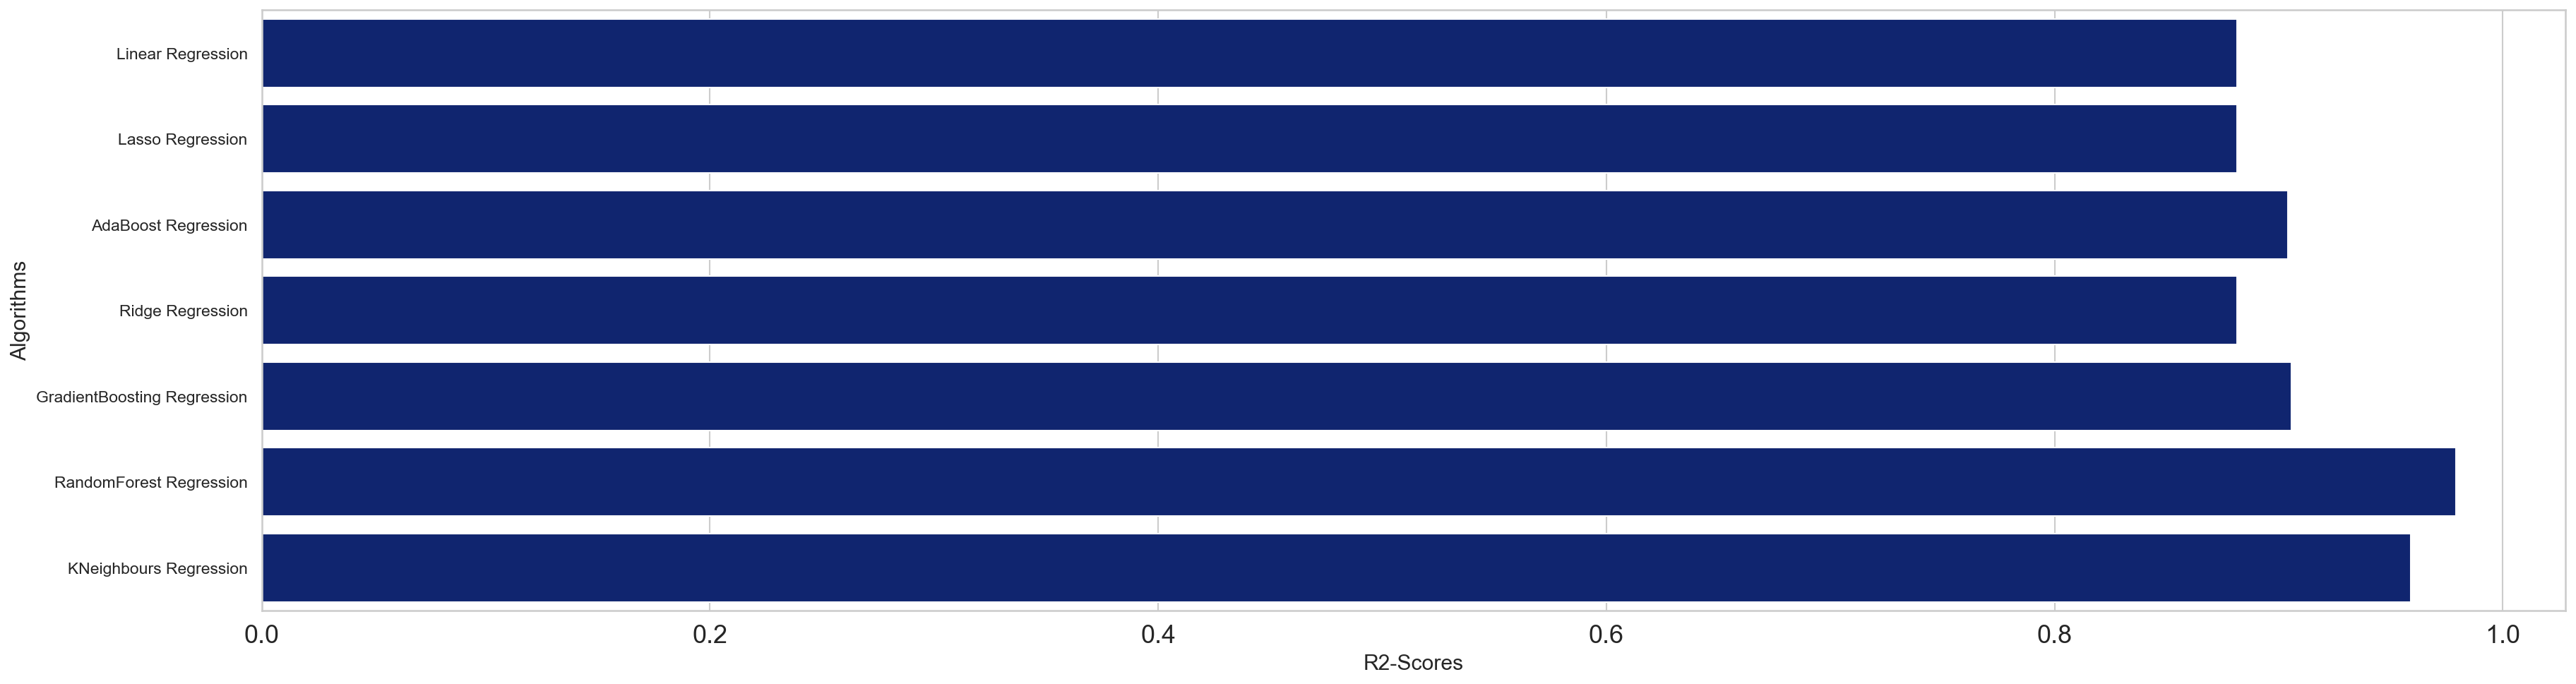

In [101]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

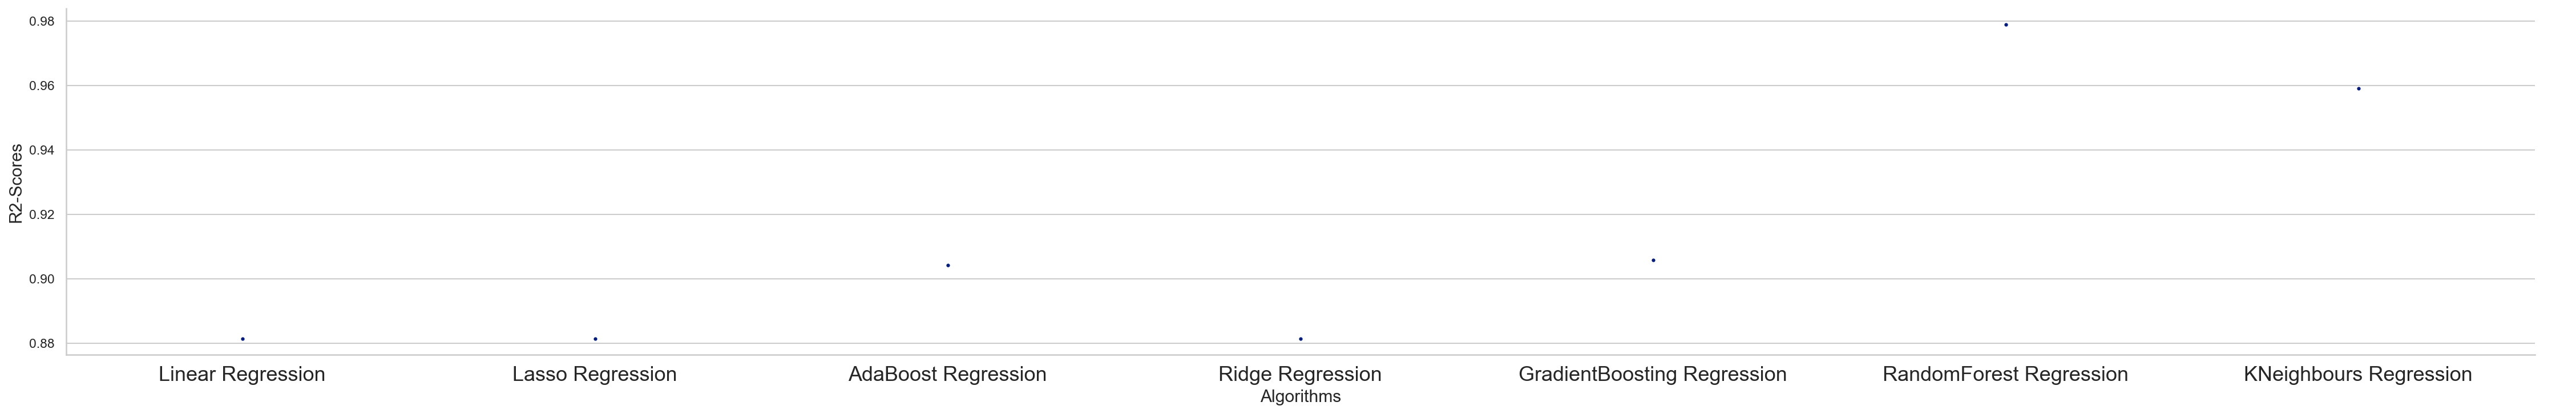

In [107]:
sns.catplot(x='Algorithms', y='R2-Scores' , data=compare, size=3, aspect=6)